C:\Users\ahosain\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")



Training TransformerModel with sequence length 20
Parameters: 281665


C:\Users\ahosain\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\functional.py:5560: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)


Epoch 1/10 | Train Loss: 2.4233 | Test Loss: 2.3281 | Test Acc: 0.3156
Epoch 2/10 | Train Loss: 2.2758 | Test Loss: 2.0694 | Test Acc: 0.3883
Epoch 3/10 | Train Loss: 2.1146 | Test Loss: 1.9542 | Test Acc: 0.4183
Epoch 4/10 | Train Loss: 2.0191 | Test Loss: 1.8749 | Test Acc: 0.4358
Epoch 5/10 | Train Loss: 1.9593 | Test Loss: 1.8231 | Test Acc: 0.4535
Epoch 6/10 | Train Loss: 1.9163 | Test Loss: 1.7810 | Test Acc: 0.4626
Epoch 7/10 | Train Loss: 1.8872 | Test Loss: 1.7515 | Test Acc: 0.4717
Epoch 8/10 | Train Loss: 1.8642 | Test Loss: 1.7354 | Test Acc: 0.4753
Epoch 9/10 | Train Loss: 1.8494 | Test Loss: 1.7242 | Test Acc: 0.4780
Epoch 10/10 | Train Loss: 1.8358 | Test Loss: 1.7267 | Test Acc: 0.4778

Training LSTMModel with sequence length 20
Parameters: 280897
Epoch 1/10 | Train Loss: 1.8605 | Test Loss: 1.6075 | Test Acc: 0.5164
Epoch 2/10 | Train Loss: 1.5704 | Test Loss: 1.5051 | Test Acc: 0.5439
Epoch 3/10 | Train Loss: 1.4974 | Test Loss: 1.4591 | Test Acc: 0.5544
Epoch 4/10 | 

C:\Users\ahosain\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")



Training TransformerModel with sequence length 30
Parameters: 281665
Epoch 1/10 | Train Loss: 2.4475 | Test Loss: 2.3734 | Test Acc: 0.3004
Epoch 2/10 | Train Loss: 2.3597 | Test Loss: 2.2718 | Test Acc: 0.3320
Epoch 3/10 | Train Loss: 2.2326 | Test Loss: 2.0344 | Test Acc: 0.3984
Epoch 4/10 | Train Loss: 2.0922 | Test Loss: 1.9241 | Test Acc: 0.4290
Epoch 5/10 | Train Loss: 2.0081 | Test Loss: 1.8618 | Test Acc: 0.4463
Epoch 6/10 | Train Loss: 1.9508 | Test Loss: 1.8129 | Test Acc: 0.4574
Epoch 7/10 | Train Loss: 1.9129 | Test Loss: 1.7792 | Test Acc: 0.4670
Epoch 8/10 | Train Loss: 1.8844 | Test Loss: 1.7629 | Test Acc: 0.4722
Epoch 9/10 | Train Loss: 1.8641 | Test Loss: 1.7494 | Test Acc: 0.4756
Epoch 10/10 | Train Loss: 1.8486 | Test Loss: 1.7415 | Test Acc: 0.4748

Training LSTMModel with sequence length 30
Parameters: 280897
Epoch 1/10 | Train Loss: 1.8626 | Test Loss: 1.6107 | Test Acc: 0.5189
Epoch 2/10 | Train Loss: 1.5688 | Test Loss: 1.5108 | Test Acc: 0.5431
Epoch 3/10 | T

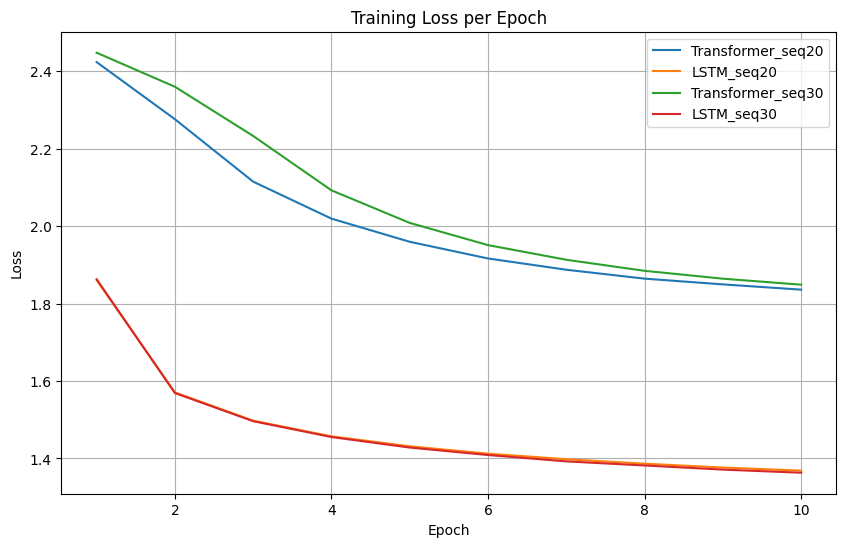

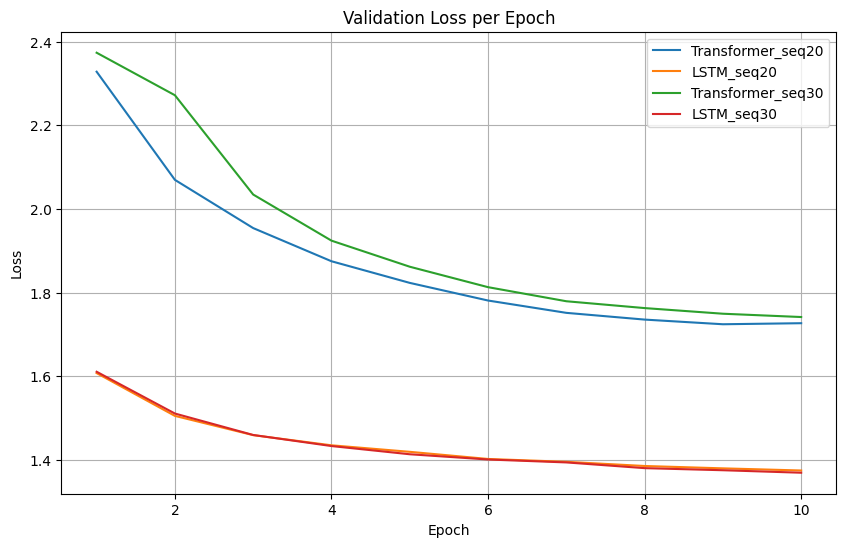

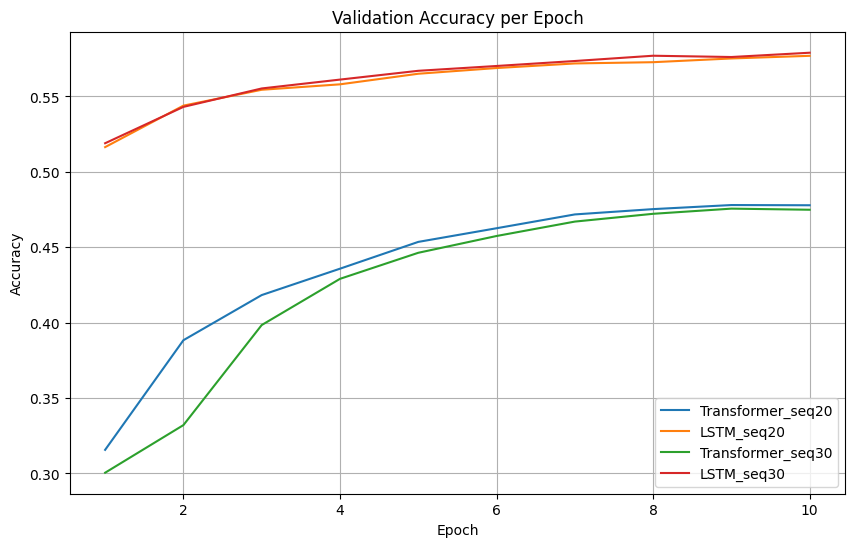

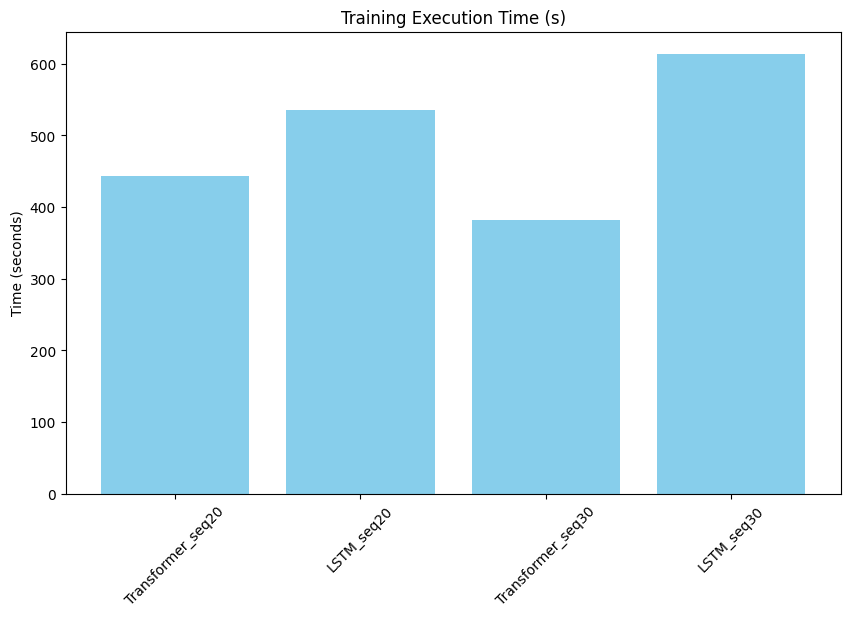

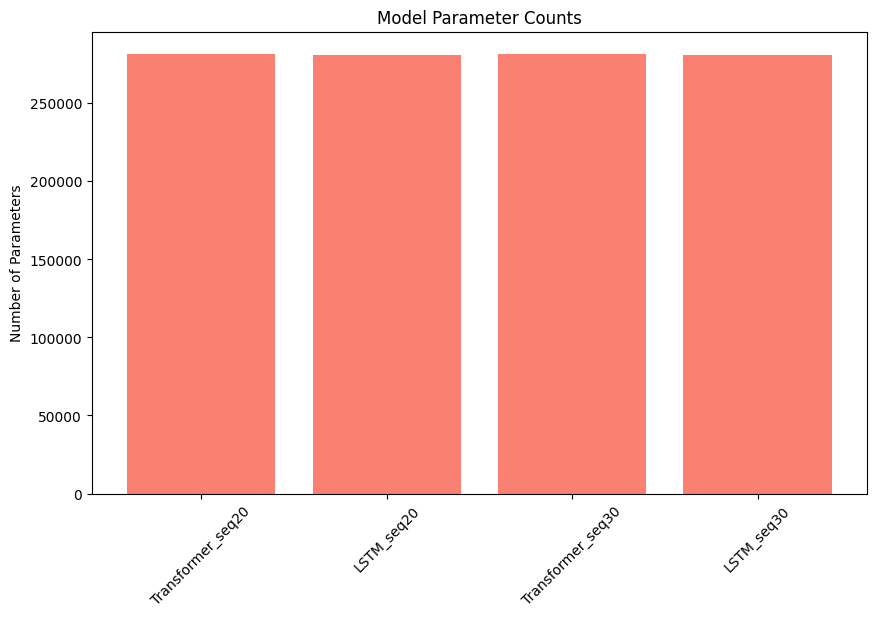


--- Theoretical Complexity Comparison ---
Transformer: O(n^2) per layer due to self-attention (n = sequence length)
LSTM: O(n) per layer (sequential processing)


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import requests
import time
import matplotlib.pyplot as plt

# -------------------------------
# Download and Prepare Data
# -------------------------------

def download_text():
    url = "https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt"
    response = requests.get(url)
    return response.text

def prepare_data(seq_length):
    text = download_text()
    # Build character vocabulary
    chars = sorted(list(set(text)))
    char_to_int = {ch: i for i, ch in enumerate(chars)}
    int_to_char = {i: ch for i, ch in enumerate(chars)}
    vocab_size = len(chars)
    
    # Encode text
    encoded_text = [char_to_int[ch] for ch in text]
    
    # Create sequences and targets
    sequences = []
    targets = []
    for i in range(0, len(encoded_text) - seq_length):
        seq = encoded_text[i:i+seq_length]
        target = encoded_text[i+seq_length]
        sequences.append(seq)
        targets.append(target)
        
    # Convert to tensors
    sequences = torch.tensor(sequences, dtype=torch.long)
    targets = torch.tensor(targets, dtype=torch.long)
    
    # Create Dataset and DataLoader
    class CharDataset(Dataset):
        def __init__(self, sequences, targets):
            self.sequences = sequences
            self.targets = targets
        def __len__(self):
            return len(self.sequences)
        def __getitem__(self, index):
            return self.sequences[index], self.targets[index]
    
    dataset = CharDataset(sequences, targets)
    batch_size = 128
    train_size = int(len(dataset) * 0.8)
    test_size = len(dataset) - train_size
    train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])
    train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
    test_loader = DataLoader(test_dataset, shuffle=False, batch_size=batch_size)
    
    return train_loader, test_loader, vocab_size, char_to_int, int_to_char

# -------------------------------
# Model Definitions
# -------------------------------

# Positional Encoding for Transformer
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        # Compute the positional encodings once in log space.
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-np.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)  # shape: (1, max_len, d_model)
        self.register_buffer('pe', pe)
        
    def forward(self, x):
        x = x + self.pe[:, :x.size(1)]
        return self.dropout(x)

# Transformer Model for Next-Character Prediction
class TransformerModel(nn.Module):
    def __init__(self, vocab_size, d_model=128, nhead=2, num_layers=2, dim_feedforward=256, dropout=0.1):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, d_model)
        self.pos_encoder = PositionalEncoding(d_model, dropout)
        encoder_layer = nn.TransformerEncoderLayer(d_model, nhead, dim_feedforward, dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers)
        self.d_model = d_model
        self.fc = nn.Linear(d_model, vocab_size)
        
    def forward(self, src):
        # src shape: (batch, seq_length)
        src = self.embedding(src) * np.sqrt(self.d_model)
        src = self.pos_encoder(src)
        # Transformer expects input shape (seq_length, batch, d_model)
        src = src.transpose(0, 1)
        output = self.transformer_encoder(src)
        # Use output corresponding to the last token for prediction
        out = output[-1, :, :]  # (batch, d_model)
        out = self.fc(out)
        return out

# LSTM-based Model for Next-Character Prediction
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_size=128, hidden_size=128, num_layers=2, dropout=0.1):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, vocab_size)
    
    def forward(self, x):
        # x shape: (batch, seq_length)
        x = self.embedding(x)
        output, _ = self.lstm(x)
        out = self.fc(output[:, -1, :])  # take the last time step
        return out

# -------------------------------
# Training and Evaluation Functions
# -------------------------------

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def train_epoch(model, dataloader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0
    for x, y in dataloader:
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        outputs = model(x)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * x.size(0)
    return running_loss / len(dataloader.dataset)

def evaluate(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    with torch.no_grad():
        for x, y in dataloader:
            x, y = x.to(device), y.to(device)
            outputs = model(x)
            loss = criterion(outputs, y)
            running_loss += loss.item() * x.size(0)
            preds = outputs.argmax(dim=1)
            correct += (preds == y).sum().item()
    accuracy = correct / len(dataloader.dataset)
    return running_loss / len(dataloader.dataset), accuracy

def train_model(model, train_loader, test_loader, device, epochs=10):
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    train_losses, test_losses, test_accuracies = [], [], []
    start_time = time.time()
    for epoch in range(epochs):
        train_loss = train_epoch(model, train_loader, optimizer, criterion, device)
        test_loss, test_acc = evaluate(model, test_loader, criterion, device)
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        test_accuracies.append(test_acc)
        print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}")
    exec_time = time.time() - start_time
    return train_losses, test_losses, test_accuracies, exec_time

# -------------------------------
# Experiment and Graphing
# -------------------------------

def run_experiment(seq_length, model_class, model_kwargs, epochs=10):
    train_loader, test_loader, vocab_size, _, _ = prepare_data(seq_length)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model_class(vocab_size, **model_kwargs).to(device)
    print(f"\nTraining {model_class.__name__} with sequence length {seq_length}")
    print("Parameters:", count_parameters(model))
    train_losses, test_losses, test_acc, exec_time = train_model(model, train_loader, test_loader, device, epochs)
    return {
        "train_losses": train_losses,
        "test_losses": test_losses,
        "test_acc": test_acc,
        "exec_time": exec_time,
        "param_count": count_parameters(model)
    }

def plot_results(results, metric_name, title, ylabel):
    plt.figure(figsize=(10,6))
    for label, res in results.items():
        epochs = list(range(1, len(res[metric_name]) + 1))
        plt.plot(epochs, res[metric_name], label=label)
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == '__main__':
    epochs = 10  # number of epochs for each experiment
    experiment_results = {}

    # Define model settings for Transformer and LSTM models.
    transformer_kwargs = dict(d_model=128, nhead=2, num_layers=2, dim_feedforward=256, dropout=0.1)
    lstm_kwargs = dict(embed_size=128, hidden_size=128, num_layers=2, dropout=0.1)

    for seq_length in [20, 30]:
        experiment_results[f"Transformer_seq{seq_length}"] = run_experiment(seq_length, TransformerModel, transformer_kwargs, epochs)
        experiment_results[f"LSTM_seq{seq_length}"] = run_experiment(seq_length, LSTMModel, lstm_kwargs, epochs)

    # Plot training loss curves
    loss_results = {key: value for key, value in experiment_results.items()}
    plot_results(loss_results, "train_losses", "Training Loss per Epoch", "Loss")

    # Plot validation loss curves
    plot_results(loss_results, "test_losses", "Validation Loss per Epoch", "Loss")

    # Plot validation accuracy curves
    plot_results(loss_results, "test_acc", "Validation Accuracy per Epoch", "Accuracy")

    # Bar chart for execution time and parameter counts
    labels = list(experiment_results.keys())
    exec_times = [experiment_results[label]["exec_time"] for label in labels]
    param_counts = [experiment_results[label]["param_count"] for label in labels]

    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax1.bar(labels, exec_times, color='skyblue')
    ax1.set_title("Training Execution Time (s)")
    ax1.set_ylabel("Time (seconds)")
    plt.xticks(rotation=45)
    plt.show()

    fig, ax2 = plt.subplots(figsize=(10, 6))
    ax2.bar(labels, param_counts, color='salmon')
    ax2.set_title("Model Parameter Counts")
    ax2.set_ylabel("Number of Parameters")
    plt.xticks(rotation=45)
    plt.show()

    # Print summary of computational complexities 
    print("\n--- Theoretical Complexity Comparison ---")
    print("Transformer: O(n^2) per layer due to self-attention (n = sequence length)")
    print("LSTM: O(n) per layer (sequential processing)")



--- Running Transformer: Layers=1, Heads=2 ---
Parameter Count: 149185
Epoch 1/5 | Train Loss: 2.5175 | Val Loss: 2.4680 | Val Acc: 0.2706
Epoch 2/5 | Train Loss: 2.4769 | Val Loss: 2.4583 | Val Acc: 0.2705
Epoch 3/5 | Train Loss: 2.4705 | Val Loss: 2.4545 | Val Acc: 0.2732
Epoch 4/5 | Train Loss: 2.4626 | Val Loss: 2.4507 | Val Acc: 0.2752
Epoch 5/5 | Train Loss: 2.4563 | Val Loss: 2.4411 | Val Acc: 0.2737

--- Running Transformer: Layers=1, Heads=4 ---
Parameter Count: 149185
Epoch 1/5 | Train Loss: 2.5131 | Val Loss: 2.4618 | Val Acc: 0.2726
Epoch 2/5 | Train Loss: 2.4679 | Val Loss: 2.4410 | Val Acc: 0.2769
Epoch 3/5 | Train Loss: 2.4550 | Val Loss: 2.4327 | Val Acc: 0.2780
Epoch 4/5 | Train Loss: 2.4465 | Val Loss: 2.4224 | Val Acc: 0.2808
Epoch 5/5 | Train Loss: 2.4404 | Val Loss: 2.4191 | Val Acc: 0.2825

--- Running Transformer: Layers=2, Heads=2 ---
Parameter Count: 281665
Epoch 1/5 | Train Loss: 2.4492 | Val Loss: 2.3837 | Val Acc: 0.2968
Epoch 2/5 | Train Loss: 2.3601 | Val

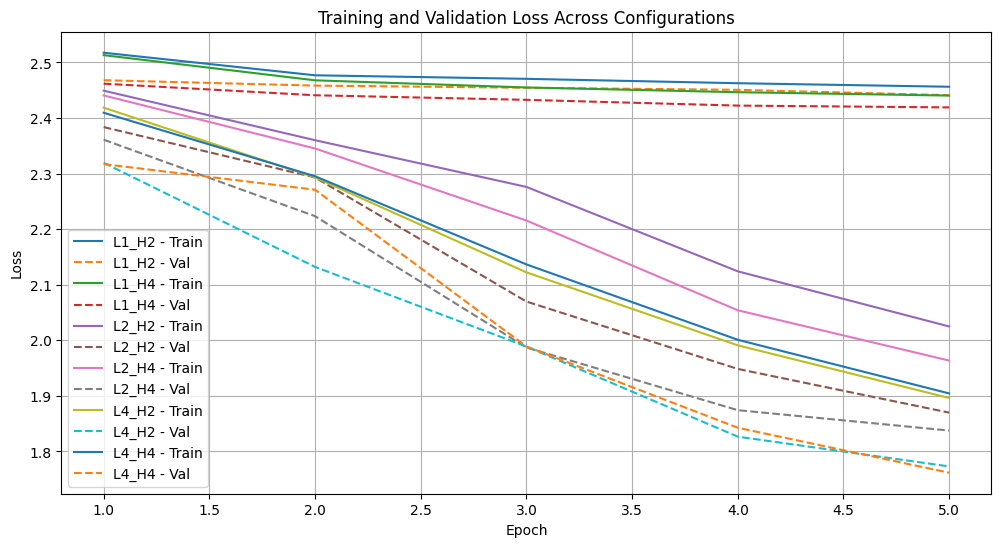


=== Summary Metrics ===
L1_H2:
  - Final Validation Accuracy: 27.37%
  - Final Validation Loss: 2.4411
  - Perplexity: 11.49
  - Training Time: 272.25 sec
  - Inference Time (avg per batch): 0.30 ms
  - Parameter Count: 149185
  - Theoretical Computation Complexity: O(num_layers * seq_length^2)

L1_H4:
  - Final Validation Accuracy: 28.25%
  - Final Validation Loss: 2.4191
  - Perplexity: 11.24
  - Training Time: 278.51 sec
  - Inference Time (avg per batch): 0.20 ms
  - Parameter Count: 149185
  - Theoretical Computation Complexity: O(num_layers * seq_length^2)

L2_H2:
  - Final Validation Accuracy: 44.08%
  - Final Validation Loss: 1.8699
  - Perplexity: 6.49
  - Training Time: 204.35 sec
  - Inference Time (avg per batch): 1.00 ms
  - Parameter Count: 281665
  - Theoretical Computation Complexity: O(num_layers * seq_length^2)

L2_H4:
  - Final Validation Accuracy: 44.85%
  - Final Validation Loss: 1.8376
  - Perplexity: 6.28
  - Training Time: 201.21 sec
  - Inference Time (avg per

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import requests
import time
import math
import matplotlib.pyplot as plt

# -------------------------------
# Data Preparation (Tiny Shakespeare)
# -------------------------------

def download_text():
    url = "https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt"
    response = requests.get(url)
    return response.text

def prepare_data(seq_length):
    text = download_text()
    # Build character vocabulary
    chars = sorted(list(set(text)))
    char_to_int = {ch: i for i, ch in enumerate(chars)}
    int_to_char = {i: ch for i, ch in enumerate(chars)}
    vocab_size = len(chars)
    
    # Encode text
    encoded_text = [char_to_int[ch] for ch in text]
    
    # Create sequences and targets
    sequences = []
    targets = []
    for i in range(len(encoded_text) - seq_length):
        sequences.append(encoded_text[i:i+seq_length])
        targets.append(encoded_text[i+seq_length])
    
    sequences = torch.tensor(sequences, dtype=torch.long)
    targets = torch.tensor(targets, dtype=torch.long)
    
    # Dataset class
    class CharDataset(Dataset):
        def __init__(self, sequences, targets):
            self.sequences = sequences
            self.targets = targets
        def __len__(self):
            return len(self.sequences)
        def __getitem__(self, idx):
            return self.sequences[idx], self.targets[idx]
    
    dataset = CharDataset(sequences, targets)
    batch_size = 128
    train_size = int(len(dataset) * 0.8)
    test_size = len(dataset) - train_size
    train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])
    train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
    test_loader = DataLoader(test_dataset, shuffle=False, batch_size=batch_size)
    
    return train_loader, test_loader, vocab_size, char_to_int, int_to_char

# -------------------------------
# Positional Encoding for Transformer
# -------------------------------
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)
        pe = torch.zeros(max_len, d_model)  # (max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-np.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)  # shape: (1, max_len, d_model)
        self.register_buffer('pe', pe)
        
    def forward(self, x):
        x = x + self.pe[:, :x.size(1)]
        return self.dropout(x)

# -------------------------------
# Transformer Model Definition
# -------------------------------
class TransformerModel(nn.Module):
    def __init__(self, vocab_size, d_model=128, nhead=2, num_layers=2, dim_feedforward=256, dropout=0.1):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, d_model)
        self.pos_encoder = PositionalEncoding(d_model, dropout)
        encoder_layer = nn.TransformerEncoderLayer(d_model, nhead, dim_feedforward, dropout, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers)
        self.d_model = d_model
        self.fc = nn.Linear(d_model, vocab_size)
    
    def forward(self, src):
        # src: (batch, seq_length)
        x = self.embedding(src) * math.sqrt(self.d_model)
        x = self.pos_encoder(x)
        # Transformer encoder (batch_first=True)
        x = self.transformer_encoder(x)
        # Use the last token's representation for prediction
        out = self.fc(x[:, -1, :])
        return out

# -------------------------------
# Training and Evaluation Functions
# -------------------------------
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def train_epoch(model, dataloader, optimizer, criterion, device):
    model.train()
    total_loss = 0.0
    for x, y in dataloader:
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        output = model(x)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * x.size(0)
    return total_loss / len(dataloader.dataset)

def evaluate(model, dataloader, criterion, device):
    model.eval()
    total_loss = 0.0
    correct = 0
    with torch.no_grad():
        for x, y in dataloader:
            x, y = x.to(device), y.to(device)
            output = model(x)
            loss = criterion(output, y)
            total_loss += loss.item() * x.size(0)
            preds = output.argmax(dim=1)
            correct += (preds == y).sum().item()
    accuracy = correct / len(dataloader.dataset)
    avg_loss = total_loss / len(dataloader.dataset)
    return avg_loss, accuracy

def measure_inference_time(model, dataloader, device, n_batches=10):
    model.eval()
    times = []
    with torch.no_grad():
        for i, (x, _) in enumerate(dataloader):
            if i >= n_batches:
                break
            x = x.to(device)
            start = time.time()
            _ = model(x)
            times.append(time.time() - start)
    return np.mean(times)

# -------------------------------
# Text Generation Function
# -------------------------------
def generate_text(model, prompt, char_to_int, int_to_char, length=200, temperature=1.0, device="cpu"):
    model.eval()
    input_seq = torch.tensor([char_to_int[ch] for ch in prompt], dtype=torch.long).unsqueeze(0).to(device)
    generated = prompt
    with torch.no_grad():
        for _ in range(length):
            output = model(input_seq)
            # Scale logits by temperature and sample
            output = output.squeeze().div(temperature).exp()
            prob = output / output.sum()
            next_char = torch.multinomial(prob, num_samples=1).item()
            generated += int_to_char[next_char]
            # Append next_char to sequence and remove first char to maintain sequence length
            input_seq = torch.cat([input_seq, torch.tensor([[next_char]], device=device)], dim=1)
            input_seq = input_seq[:, -input_seq.size(1):]
    return generated

# -------------------------------
# Experiment Function
# -------------------------------
def run_experiment(num_layers, nhead, seq_length=30, epochs=5):
    # Prepare data
    train_loader, test_loader, vocab_size, char_to_int, int_to_char = prepare_data(seq_length)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Instantiate model with adjustable hyperparameters
    model = TransformerModel(
        vocab_size,
        d_model=128,
        nhead=nhead,
        num_layers=num_layers,
        dim_feedforward=256,
        dropout=0.1
    ).to(device)
    
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    
    train_losses = []
    val_losses = []
    val_accuracies = []
    
    print(f"\n--- Running Transformer: Layers={num_layers}, Heads={nhead} ---")
    print("Parameter Count:", count_parameters(model))
    
    start_time = time.time()
    for epoch in range(epochs):
        train_loss = train_epoch(model, train_loader, optimizer, criterion, device)
        val_loss, val_acc = evaluate(model, test_loader, criterion, device)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)
        print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")
    
    train_time = time.time() - start_time
    inference_time = measure_inference_time(model, test_loader, device)
    perplexity = math.exp(val_losses[-1])
    
    results = {
        "num_layers": num_layers,
        "nhead": nhead,
        "train_losses": train_losses,
        "val_losses": val_losses,
        "val_accuracies": val_accuracies,
        "train_time": train_time,
        "inference_time": inference_time,
        "param_count": count_parameters(model),
        "perplexity": perplexity,
        "model": model,
        "char_to_int": char_to_int,
        "int_to_char": int_to_char
    }
    return results

# -------------------------------
# Run Experiments for Multiple Hyperparameter Combinations
# -------------------------------
experiment_results = {}
configurations = []
# Explore transformer architectures with 1, 2, and 4 layers and 2 and 4 heads.
for num_layers in [1, 2, 4]:
    for nhead in [2, 4]:
        config_name = f"L{num_layers}_H{nhead}"
        results = run_experiment(num_layers, nhead, seq_length=30, epochs=5)
        experiment_results[config_name] = results
        configurations.append(config_name)

# -------------------------------
# Plot Training and Validation Loss Curves
# -------------------------------
plt.figure(figsize=(12, 6))
for config in configurations:
    epochs_range = range(1, len(experiment_results[config]["train_losses"]) + 1)
    plt.plot(epochs_range, experiment_results[config]["train_losses"], label=f"{config} - Train")
    plt.plot(epochs_range, experiment_results[config]["val_losses"], linestyle="--", label=f"{config} - Val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Across Configurations")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------
# Report Metrics for Each Configuration
# -------------------------------
print("\n=== Summary Metrics ===")
for config in configurations:
    res = experiment_results[config]
    print(f"{config}:")
    print(f"  - Final Validation Accuracy: {res['val_accuracies'][-1]*100:.2f}%")
    print(f"  - Final Validation Loss: {res['val_losses'][-1]:.4f}")
    print(f"  - Perplexity: {res['perplexity']:.2f}")
    print(f"  - Training Time: {res['train_time']:.2f} sec")
    print(f"  - Inference Time (avg per batch): {res['inference_time']*1000:.2f} ms")
    print(f"  - Parameter Count: {res['param_count']}")
    print("  - Theoretical Computation Complexity: O(num_layers * seq_length^2)")
    print("")

# -------------------------------
# Generate Output Sequence Using Best Configuration
# -------------------------------

best_config = max(experiment_results.items(), key=lambda x: x[1]["val_accuracies"][-1])[0]
best_model = experiment_results[best_config]["model"]
best_char_to_int = experiment_results[best_config]["char_to_int"]
best_int_to_char = experiment_results[best_config]["int_to_char"]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
prompt = "To be, or not to be, "  # example prompt
generated_sequence = generate_text(best_model, prompt, best_char_to_int, best_int_to_char, length=200, temperature=0.8, device=device)
print(f"\n--- Generated Text from Best Model ({best_config}) ---")
print(generated_sequence)


Epoch 1/10 | Train Loss: 2.4828 | Train Acc: 27.08% | Val Loss: 2.4175 | Val Acc: 28.55%
Epoch 2/10 | Train Loss: 2.4118 | Train Acc: 28.72% | Val Loss: 2.3337 | Val Acc: 30.82%
Epoch 3/10 | Train Loss: 2.3492 | Train Acc: 30.66% | Val Loss: 2.2326 | Val Acc: 34.21%
Epoch 4/10 | Train Loss: 2.1985 | Train Acc: 35.13% | Val Loss: 2.0105 | Val Acc: 40.11%
Epoch 5/10 | Train Loss: 2.0633 | Train Acc: 38.78% | Val Loss: 1.8911 | Val Acc: 43.56%
Epoch 6/10 | Train Loss: 1.9873 | Train Acc: 40.93% | Val Loss: 1.8257 | Val Acc: 45.46%
Epoch 7/10 | Train Loss: 1.9396 | Train Acc: 42.16% | Val Loss: 1.7871 | Val Acc: 46.54%
Epoch 8/10 | Train Loss: 1.9057 | Train Acc: 43.11% | Val Loss: 1.7672 | Val Acc: 47.08%
Epoch 9/10 | Train Loss: 1.8801 | Train Acc: 43.80% | Val Loss: 1.7453 | Val Acc: 47.50%
Epoch 10/10 | Train Loss: 1.8611 | Train Acc: 44.29% | Val Loss: 1.7439 | Val Acc: 47.71%

Total Training Time: 399.70 sec
Model Complexity (Parameter Count): 281665
Theoretical Computational Complex

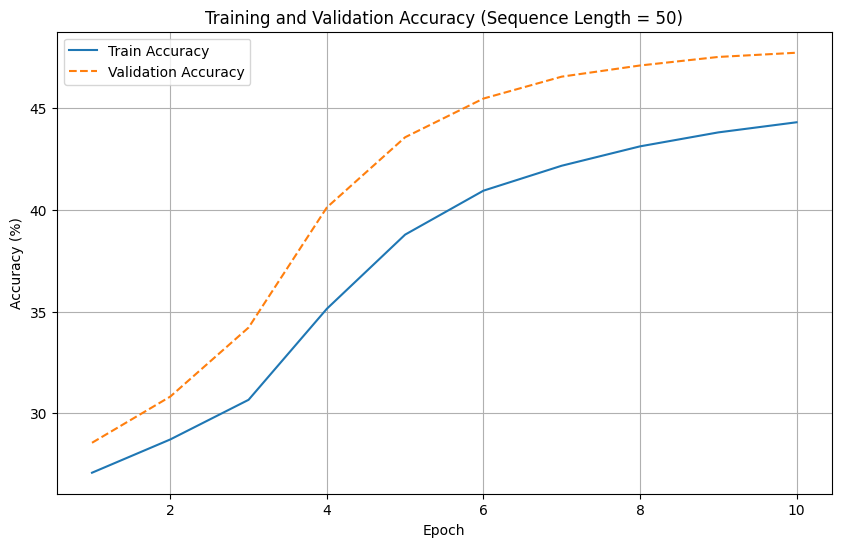

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import requests
import time
import math
import matplotlib.pyplot as plt

# -------------------------------
# Data Preparation
# -------------------------------
def download_text():
    url = "https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt"
    response = requests.get(url)
    return response.text

def prepare_data(seq_length=50):
    text = download_text()
    # Build character vocabulary
    chars = sorted(list(set(text)))
    char_to_int = {ch: i for i, ch in enumerate(chars)}
    int_to_char = {i: ch for i, ch in enumerate(chars)}
    vocab_size = len(chars)
    
    # Encode text
    encoded_text = [char_to_int[ch] for ch in text]
    
    # Create sequences and targets
    sequences = []
    targets = []
    for i in range(len(encoded_text) - seq_length):
        sequences.append(encoded_text[i:i+seq_length])
        targets.append(encoded_text[i+seq_length])
    
    sequences = torch.tensor(sequences, dtype=torch.long)
    targets = torch.tensor(targets, dtype=torch.long)
    
    # Define custom Dataset
    class CharDataset(Dataset):
        def __init__(self, sequences, targets):
            self.sequences = sequences
            self.targets = targets
        def __len__(self):
            return len(self.sequences)
        def __getitem__(self, idx):
            return self.sequences[idx], self.targets[idx]
    
    dataset = CharDataset(sequences, targets)
    batch_size = 128
    train_size = int(len(dataset) * 0.8)
    test_size = len(dataset) - train_size
    train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])
    train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
    test_loader = DataLoader(test_dataset, shuffle=False, batch_size=batch_size)
    
    return train_loader, test_loader, vocab_size, char_to_int, int_to_char

# -------------------------------
# Positional Encoding
# -------------------------------
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)
        pe = torch.zeros(max_len, d_model)  # (max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-np.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)  # shape: (1, max_len, d_model)
        self.register_buffer('pe', pe)
        
    def forward(self, x):
        x = x + self.pe[:, :x.size(1)]
        return self.dropout(x)

# -------------------------------
# Transformer Model Definition
# -------------------------------
class TransformerModel(nn.Module):
    def __init__(self, vocab_size, d_model=128, nhead=2, num_layers=2, dim_feedforward=256, dropout=0.1):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, d_model)
        self.pos_encoder = PositionalEncoding(d_model, dropout)
        # Using batch_first=True to work with (batch, seq_length, embedding)
        encoder_layer = nn.TransformerEncoderLayer(d_model, nhead, dim_feedforward, dropout, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers)
        self.d_model = d_model
        self.fc = nn.Linear(d_model, vocab_size)
    
    def forward(self, src):
        # src: (batch, seq_length)
        x = self.embedding(src) * math.sqrt(self.d_model)
        x = self.pos_encoder(x)
        x = self.transformer_encoder(x)
        # Use the last token representation for prediction
        out = self.fc(x[:, -1, :])
        return out

# -------------------------------
# Training and Evaluation Functions
# -------------------------------
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def train_epoch(model, dataloader, optimizer, criterion, device):
    model.train()
    total_loss = 0.0
    correct = 0
    total = 0
    for x, y in dataloader:
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        outputs = model(x)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * x.size(0)
        preds = outputs.argmax(dim=1)
        correct += (preds == y).sum().item()
        total += x.size(0)
    avg_loss = total_loss / total
    accuracy = correct / total
    return avg_loss, accuracy

def evaluate(model, dataloader, criterion, device):
    model.eval()
    total_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for x, y in dataloader:
            x, y = x.to(device), y.to(device)
            outputs = model(x)
            loss = criterion(outputs, y)
            total_loss += loss.item() * x.size(0)
            preds = outputs.argmax(dim=1)
            correct += (preds == y).sum().item()
            total += x.size(0)
    avg_loss = total_loss / total
    accuracy = correct / total
    return avg_loss, accuracy

# -------------------------------
# Main Training Loop
# -------------------------------
def main_training(seq_length=50, epochs=10):
    train_loader, test_loader, vocab_size, char_to_int, int_to_char = prepare_data(seq_length)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Instantiate Transformer model with desired hyperparameters
    model = TransformerModel(vocab_size, d_model=128, nhead=2, num_layers=2, dim_feedforward=256, dropout=0.1).to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []
    
    start_time = time.time()
    for epoch in range(epochs):
        train_loss, train_acc = train_epoch(model, train_loader, optimizer, criterion, device)
        test_loss, test_acc = evaluate(model, test_loader, criterion, device)
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)
        print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc*100:.2f}% | Val Loss: {test_loss:.4f} | Val Acc: {test_acc*100:.2f}%")
    
    total_training_time = time.time() - start_time
    print(f"\nTotal Training Time: {total_training_time:.2f} sec")
    print(f"Model Complexity (Parameter Count): {count_parameters(model)}")
    print("Theoretical Computational Complexity per layer: O(seq_length^2) (seq_length = 50 in this case)")
    
    # Plot accuracy curves
    epochs_range = range(1, epochs+1)
    plt.figure(figsize=(10,6))
    plt.plot(epochs_range, [acc * 100 for acc in train_accuracies], label="Train Accuracy")
    plt.plot(epochs_range, [acc * 100 for acc in test_accuracies], label="Validation Accuracy", linestyle="--")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy (%)")
    plt.title("Training and Validation Accuracy (Sequence Length = 50)")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return model, char_to_int, int_to_char

if __name__ == '__main__':
    # Increase the sequence length to 50 and train for 10 epochs.
    model, char_to_int, int_to_char = main_training(seq_length=50, epochs=10)
